# Definition

Consider a dataset of two classes can be separated by the linear model of the form

$$y(\mathbf{x}) = \mathbf{w}^T\phi(\mathbf{x}) + b \tag{7.1}$$

There may of course exist many such solutions that separate the classes exactly. <font color='red'>In support vector machines, the decision boundary $y(\mathbf{x})$ is chosen to be the one that gives maximal margin.</font> The concept margin is defined to be the smallest distance between the dicition boundary and any of the samples.

# Mathmatic representation

Recall from Section 4.1 that  the perpendicular distance of a point $\mathbf{x}$ from a hyperplane defined by $y(\mathbf{x})=0$ is given by $|y(\mathbf{x})|/\|\mathbf{w}\|$. Now suppose that the samples with $y(\mathbf{x})>0$ denote class $1$, and the samples with $y(\mathbf{x})<0$ denote class $2$. Then we can let the target value be $t=1$ for class $1$ and $t=-1$ for class $2$ such that $|y(\mathbf{x})| = ty(\mathbf{x})$. Thus the distance of a point $\mathbf{x}_n$ to the decision surface is given by

$$\frac{|y(\mathbf{x}_n)|}{\|\mathbf{w}\|} = \frac{t_n y(\mathbf{x}_n)}{\|\mathbf{w}\|} = \frac{t_n\big(\mathbf{w}^T\phi(\mathbf{x}_n)+b\big)}{\|\mathbf{w}\|} \tag{7.2}$$

The margin is given by the perpendicular distance to the closest point $\mathbf{x}_n$ from the data set, and we wish to optimize the parameters $\mathbf{w}$ and $b$ in order to maximize this distance. Thus the maximum margin solution is found by solving

$$\underset{\mathbf{w},b}{arg\ max\ }\left\{\frac{1}{\|\mathbf{w}\|}\underset{n}{min}\big[t_n\big(\mathbf{w}^T\phi(\mathbf{x}_n) + b\big)\big]\right\} \tag{7.3}$$

## Constraints

Direct solution of this optimization problem would be very complex, and so we shall convert it into an equivalent problem that is much easier to solve. <font color='blue'>To do this we note that if we make the rescaling $\mathbf{w} \to \kappa \mathbf{w}$ and $b\to \kappa b$, then the distance from any point $\mathbf{x}_n$ to the decision surface is unchanged. We can use this freedom to set</font>

$$t_n\big(\mathbf{w}^T\phi(\mathbf{x}_n)+b\big) = 1 \tag{7.4}$$

<font color='blue'>for the point that is closest to the surface.</font> In this case, all data points will satisfy the constraints

$$t_n(\mathbf{w}^T\phi(\mathbf{x}_n)+b) \geqslant 1 \tag{7.5}$$

- For the case that the point $\mathbf{x}_n$ lie on the boundary of the margin, the equality of the equation holds, the constraints are said to be *active*. 
- For the case that the point $\mathbf{x}_n$ not lie on the boundary of the margin, the equality of the equation doesn't hold, the constriants are said to be *inactive*. 

## Problem

The optimization problem then simpliy requires that we maximize $\|\mathbf{w}\|^{-1}$, which is equivalent to minimizing $\|\mathbf{w}\|^2$.

$$\underset{\mathbf{w},b}{min}\frac{1}{2}\|\mathbf{w}\|^2 \tag{7.6}$$

suject to the constriants given by (7.5). The factor of $\frac{1}{2}$ in (7.6) is included for later convenience.


# Solution 

## Introduce Lagrange multiplier

According to the discussion in Lagrange multiplier, we can solve the SVM problem by finding the solution of

$$\underset{\mathbf{a}\geqslant 0}{max}\ \underset{\mathbf{w}, b}{min}\ L(\mathbf{w}, b, \mathbf{a})$$

where $L(\mathbf{w}, b,\mathbf{a})$ is known as the objective function and takes the form

$$
\left.\begin{array}{ll}
\text{Problem:} & \underset{\mathbf{w},b}{min}\frac{1}{2}\|\mathbf{w}\|^2 \\
\text{Constraint:} &t_n(\mathbf{w}^T\phi(\mathbf{x}_n)+b) \geqslant 1 
\end{array}\right\}
\Rightarrow
L(\mathbf{w},b,\mathbf{a}) = \frac{1}{2}\|\mathbf{w}\|^2 - \sum_{n=1}^N a_n\{t_n(\mathbf{w}^T \phi(\mathbf{x}_n)+b)-1\} \tag{7.7}$$


Then our goal turns to be searching for $\mathbf{w}$, $b$ that minimize $L$ as well as the $\mathbf{a}$ that maximize the objective function.

$$\mathbf{w}^\star, b^\star = \underset{\mathbf{w},b}{argmin}L(\mathbf{w},b,\mathbf{a})\qquad \mathbf{a}^\star = \underset{\mathbf{a\geqslant 0}}{argmax}L(\mathbf{w}^\star,b^\star, \mathbf{a})$$

Setting the derivatives of $L$ with respect to $\mathbf{w}$ and $b$ equal to zero, we obtain the following two conditions

$$\begin{align*}
0 &= \frac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum_{n=1}^N a_nt_n \phi(\mathbf{x}_n)\qquad \Rightarrow \qquad \mathbf{w} = \sum_{n=1}^N a_nt_n \phi(\mathbf{x}_n) \tag{7.8}\\
0 &= \frac{\partial L}{\partial b} = \sum_{n=1}^N a_n t_n \tag{7.9}
\end{align*}$$

where (7.8) means the weight vector $\mathbf{w}$ changes along the Lagrange multipliers $\mathbf{a}$, and (7.9) is a linear equality constraint that the Lagrange multipliers need to obey. Substituting these condition into $L$, we can eliminate $\mathbf{w}$ and $b$ such that obtain a dual representation

$$\begin{align*}
\bbox[#ffe0f0]{L(\mathbf{w}^\star,b^\star,\mathbf{a})} &= \frac{1}{2}\sum_{n=1}^N a_n t_n \phi(\mathbf{x}_n) \sum_{m=1}^N a_m t_m \phi(\mathbf{x}_m) - \left\{\sum_{n=1}^N a_n t_n\left(\sum_{m=1}^N a_m t_m \phi(\mathbf{x}_m)^T\right)\phi(\mathbf{x}_n) + \sum_{n=1}^N a_n t_n b - \sum_{n=1}^N a_n\right\} \\
&= \bbox[#ffe0f0]{\sum_{n=1}^N a_n - \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m t_n t_m k(\mathbf{x}_n, \mathbf{x}_m)} \tag{7.10}
\end{align*}$$

Our goal is to solve this quadratic problem suject to $\mathbf{a}\geqslant 0$ and the linear equality constraint.

$$\bbox[#e0f0ff]{\mathbf{a}^\star = \underset{\mathbf{a}\geqslant 0}{argmax} L(\mathbf{w}^\star,b^\star,\mathbf{a}) = \underset{\mathbf{a}\geqslant 0}{argmin}\Big\{ -L(\mathbf{w}^\star,b^\star,\mathbf{a})\Big\} \qquad s.t.\ \sum_{n=1}^N a_n t_n = 0}$$

which can be achieved by using the algorithm SMO ($C\to\infty$).

## Solution of $\mathbf{w}$

As we said before, the weight vector $\mathbf{w}$ changes along the Lagrange multipliers $\mathbf{a}$, and we just got the value of $\mathbf{a}$, thus we can obtain the solution of $\mathbf{w}$ using the equation

$$\mathbf{w}^\star = \sum_{n=1}^N a_n^\star t_n \phi(\mathbf{x}_n)$$


## Solution of $b$

<font color='grey'>*SMO also compute the value of $b$.*</font>

<font color='#aaaaaa'>

The Lagrange multiplier theorey suggests that the solution of $\mathbf{a}$ satisfies the KKT condition that takes the form

$$\left.\begin{array}{ll}
a_n\geqslant 0 & (7.14)\\
t_n y_n - 1 \geqslant 0 & (7.15)\\
a_n (t_n y_n - 1) = 0 & (7.16)
\end{array}\right\}
\Rightarrow
\left\{\begin{array}{ll}
\text{if }a_n = 0, & t_n y_n > 1 &(\mathbf{x}_n \text{ outside the margin})\\
\text{if }a_n > 0, & t_n y_n = 1 &(\mathbf{x}_n \text{ on the boundary of the margin})
\end{array}\right.$$

where we have defined $y_n = y(\mathbf{x}_n) = \mathbf{w}^T\phi(\mathbf{x}_n) + b$. <font color='green'>The data points that lie on the boundary of the margin are callded *support vectors*. </font>


Hence, for any $\mathbf{x}_n$ that lies on the boundary of the margin, the following equation holds

$$t_n y_n = t_n\left(\sum_{m\in \mathcal{S}}a_m t_m k(\mathbf{x}_n, \mathbf{x}_m) + b^\star\right) = 1 \tag{7.17}$$

where $\mathcal{S}$ denotes the set of indices of the support vectors. Although we can solve this equation for $b$ using an arbitrarily chosen support vector $\mathbf{x}_n$, a numerically more stable solution is obtained by first multiplying through by $t_n$, making use of $t_n^2=1$, and then averaging these equations over all support vectors and solving for $b$ to give

$$b^\star = \frac{1}{N_{\mathcal{S}}}\sum_{n\in\mathcal{S}}\left(t_n - \sum_{m\in\mathcal{S}}a_m t_m k(\mathbf{x}_n, \mathbf{x}_m)\right) \tag{7.18}$$

where $N_{\mathcal{S}}$ is the total number of support vectors.
</font>

# Equivalent error function

For later comparison with alternative models (Section 7.1.2), we can express the maximum-margin classifier in terms of the minimization of an error function, with a simple quadratic regularizer, in the form

$$\sum_{n=1}^N E_{\infty}\big(y_n t_n - 1\big) + \lambda \|\mathbf{w}\|^2 \tag{7.19}$$

where $E_{\infty}\big(z\big) = \left\{
\begin{array}{ll}
0, &\text{if }z\geqslant 0\\
\infty, &\text{otherwise}
\end{array}\right.$.

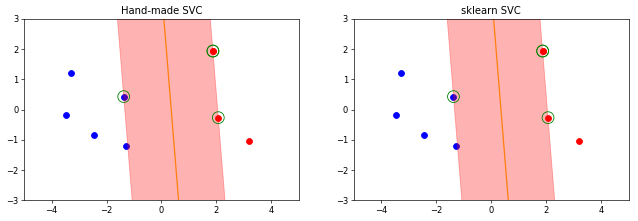

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import logging
import sys
from sklearn.svm import SVC

# convert warnings to error
warnings.filterwarnings("error")

def getLogger(name):
    logger = logging.getLogger(name)
    if len(logger.handlers) == 0:
        handler = logging.StreamHandler(sys.stdout)
        formatter = logging.Formatter('%(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        logger.setLevel(logging.WARNING)
    return logger

logger = getLogger("Separable SVC")

kernel = lambda x, y: x@y

def gen_data(n):
    n = 2*n
    x1 = np.random.uniform(-4, 4, size=n)
    x2 = np.random.uniform(-2, 2, size=n)
    X = None
    T = None
    for i in range(n):
        if x1[i] + x2[i] > .5:
            t = 1
        elif x1[i] + x2[i] < -.5:
            t = -1
        else:
            continue
        x = np.array([x1[i], x2[i]])
        if X is None:
            X = np.copy(x)
            T = np.array([t])
        X = np.vstack((X, x))
        T = np.hstack((T, t))
    return X, T

def draw_points(ax, X, T):
    for i in range(len(T)):
        if T[i]==1:
            ax.scatter(X[i][0], X[i][1], s=50, color='red')
        elif T[i]==-1:
            ax.scatter(X[i][0], X[i][1], s=50, color='blue')
    return

class SMO:
    A = None
    X = None
    T = None
    E = None
    b = 0.0
    C = 0.0
    eps = 1e-4
    
    def __init__(self, X, T, C):
        length = len(T)
        self.X = X
        self.T = T
        self.C = C
        # linear equality
        if C>100:
            F = 100
        else:
            F = C
        self.A = np.copy(1.0*T)
        NP = np.sum(self.A[self.A==1])
        NN = length - NP
        NM = max(NP, NN)
        if NM == length:
            logger.error("T:\n {}".format(T))
            raise Exception("Dataset has only one class!")
        factor = (F/2)/NM
        self.A[self.A==1] = factor * NN
        self.A[self.A==-1] = factor * NP
        
        ynb = np.zeros(length)
        for i in range(length):
            ynb[i] = (self.A*self.T)@kernel(X, X[i])
        self.b = np.sum(T - ynb)/length
        self.E = ynb + self.b - T
        logger.info("Initialize \n A = {} \n b = {} \n E = {}".format(self.A, self.b, self.E))
        return

    def Psi(self, A2, k11, k22, k12, t1, t2, E1, E2, a1, a2, b, s):
        A1 = a1+s*(a2-A2)
        ret = .5*A1**2*k11 + .5*A2**2*k22 + s*A1*A2*k12 + (t1*(E1-b)-a1*k11-s*a2*k12)*A1 + (t2*(E2-b)-s*a1*k12-a2*k22)*A2
        return ret
    
    def meet_KKT(self, i):
        # latent precision issue
        #
        # from the equation y = A*T @ kernel(X, x) we can find that X will expand the errors
        eps = self.eps*len(self.T)
        y = self.A*self.T @ kernel(self.X, self.X[i]) + self.b
        logger.info("t = {}, y = {}".format(self.T[i], y))
        if abs(self.A[i])<eps and self.T[i]*y>=1:
            return 1
        if self.A[i]>0 and self.A[i]<self.C and abs(self.T[i]*y-1)<eps:
            return 1
        if abs(self.A[i]-self.C)<eps and self.T[i]*y<=1:
            return 1
        return 0
    
    def optimize(self, i, j):
        if i==j:
            return 0
        a1 = self.A[i]
        a2 = self.A[j]
        x1 = self.X[i]
        x2 = self.X[j]
        t1 = self.T[i]
        t2 = self.T[j]
        E1 = self.E[i]
        E2 = self.E[j]
        C  = self.C
        b  = self.b
        s  = t1*t2
        k11 = kernel(x1, x1)
        k22 = kernel(x2, x2)
        k12 = kernel(x1, x2)
        eps = self.eps
        
        if s==-1:
            L = max(0, a2-a1)
            H = min(C, C+a2-a1)
        elif s==1:
            L = max(0, a2+a1-C)
            H = min(C, a2+a1)
        if L==H:
            logger.info("[{},{}] L==H={}".format(i, j, L))
            return 0
        eta = k11 + k22 - 2*k12
        if eta>0:
            a2new = a2 + t2*(E1-E2)/eta
            logger.info("[{},{}] a2new = {} L = {}, H = {}".format(i, j, a2new, L, H))
            logger.info("eta = {}, E = {}".format(eta, self.E))
            a2new = np.clip(a2new, L, H)
        else:
            SL = self.Psi(L, k11, k22, k12, t1, t2, E1, E2, a1, a2, b, s)
            SH = self.Psi(H, k11, k22, k12, t1, t2, E1, E2, a1, a2, b, s)
            if SL < SH:
                a2new = L
            elif SH < SL:
                a2new = H
            else:
                a2new = a2
            logger.info("[{},{}] L or H or a2\n a2new = {}".format(i, j, a2new))
        if abs(a2 - a2new) < eps:
            logger.info('[{},{}] L={}, H={}, a2new={}'.format(i, j, L, H, a2new))
            logger.info('[{},{}] eta {} error {}'.format(i, j, eta, self.E))
            logger.info("[{},{}] a2==a2new = {}".format(i, j, a2new))
            return 0
        a1new = a1+s*(a2-a2new)
        self.A[i] = a1new
        self.A[j] = a2new
        
        n = 0
        b1new = 0
        b2new = 0
        
        if a1new > 0 and a1new < C:
            b1new = -E1 - (a1new-a1)*t1*k11 - (a2new-a2)*t2*k12 + b
            n = 1
            logger.info("[{},{}] a1 new non bound".format(i, j))
        elif a2new > 0 and a2new < C:
            b2new = -E2 - (a1new-a1)*t1*k12 - (a2new-a2)*t2*k22 + b
            n = 1
            logger.info("[{},{}] a2 new non bound".format(i, j))
        else:
            b1new = -E1 - (a1new-a1)*t1*k11 - (a2new-a2)*t2*k12 + b
            b2new = -E2 - (a1new-a1)*t1*k12 - (a2new-a2)*t2*k22 + b
            n = 2
            logger.info("[{},{}] a1 new a2 new bound".format(i, j))
        bnew = (b1new + b2new)/n
        self.b = bnew
        
        for k in range(len(self.X)):
            self.E[k] = self.E[k] + (a1new-a1)*t1*kernel(x1, self.X[k]) + (a2new-a2)*t2*kernel(x2, self.X[k]) + (bnew - b)
        return 1

    def pair_optimize(self, i):
        length = len(self.T)
        j = np.argmax(np.abs(self.E[i] - self.E))
        update = self.optimize(i, j)
        if update==1:
            logger.info("[{},{}] A = {}".format(i, j, self.A))
            return update
        for j in range(length):
            if self.A[j]>0 and self.A[j]<self.C:
                update = self.optimize(i, j)
                if update == 1:
                    logger.info("[{},{}] A = {}".format(i, j, self.A))
                    return update
        for j in range(length):
            if self.A[j]<=0 or self.A[j]>=self.C:
                update = self.optimize(i, j)
                if update == 1:
                    logger.info("[{},{}] A = {}".format(i, j, self.A))
                    return update
        return 0

    def train(self):
        length = len(self.T)
        finished = 0
        initialized = 1
        count = 0
        while finished != 1:
            count += 1
            if count == 1000:
                logger.warning("too long!!!!!")
                break
            if initialized==1 or validation==1:
                initialized = 0
                validation = 0
                update = 0
                for i in range(length):
                    update += self.pair_optimize(i)
                if update == 0:
                    finished = 1
            else:
                while True:
                    # find the multiplier that violate KKT condition
                    idx = -1
                    for i in range(length):
                        if self.A[i]>0 and self.A[i]<self.C:
                            is_kkt = self.meet_KKT(i)
                            logger.info("[{}] non bound update meet KKT:{}".format(i, is_kkt))
                            if is_kkt==0:
                                idx = i
                                self.pair_optimize(i)
                    # if all non-bound multipliers meet the KKT conditions
                    if idx == -1:
                        break
                validation = 1
        return

    def draw(self, ax):
        logger.info("lagrange multiplier {}".format(self.A))
        x = np.array([-5, 5])
        y = np.zeros(x.shape)
        w = (self.A*self.T)@self.X
        logger.info("w = {}, b = {}".format(w, self.b))
        y[0] = (-self.b - w[0] * x[0]) / w[1]
        y[1] = (-self.b - w[0] * x[1]) / w[1]
        ax.plot(x, y, color='C1')
        
        y1 = np.zeros(x.shape)
        y2 = np.zeros(x.shape)
        y1[0] = (1-self.b - w[0] * x[0]) / w[1]
        y1[1] = (1-self.b - w[0] * x[1]) / w[1]
        y2[0] = (-1-self.b - w[0] * x[0]) / w[1]
        y2[1] = (-1-self.b - w[0] * x[1]) / w[1]
        if y1[0] < y2[0]:
            ax.fill_between(x, y1, y2, color='r', alpha=.3)
        else:
            ax.fill_between(x, y2, y1, color='r', alpha=.3)
        
        for i in range(len(self.T)):
            if abs(self.A[i]) > 1e-10:
                ax.scatter(self.X[i][0], self.X[i][1], s=200, edgecolors='green', facecolors='none')
        return

def sklearn_SVC(ax, X, T, C):
    svc = SVC(kernel='linear', C = C)
    svc.fit(X, T)
    n = np.sum(svc.n_support_)
    w = svc.coef_.reshape(-1, 1)
    idxs = svc.support_
    a = svc.dual_coef_.reshape(-1,1)
    b = svc.intercept_ 
    y = svc.predict(X[idxs])
    logger.info("a = {} idxs = {} w = {} b={}".format(a, idxs, w, b))
    
    x = np.array([-5, 5])
    y = np.zeros(x.shape)
    logger.info("w = {}, b = {}".format(w, b))
    y[0] = (-b - w[0] * x[0]) / w[1]
    y[1] = (-b - w[0] * x[1]) / w[1]
    ax.plot(x, y, color='C1')
    
    y1 = np.zeros(x.shape)
    y2 = np.zeros(x.shape)
    y1[0] = (1-b - w[0] * x[0]) / w[1]
    y1[1] = (1-b - w[0] * x[1]) / w[1]
    y2[0] = (-1-b - w[0] * x[0]) / w[1]
    y2[1] = (-1-b - w[0] * x[1]) / w[1]
    if y1[0] < y2[0]:
        ax.fill_between(x, y1, y2, color='r', alpha=.3)
    else:
        ax.fill_between(x, y2, y1, color='r', alpha=.3)
    
    ax.scatter(X[idxs, 0], X[idxs, 1], s=200, edgecolors='green', facecolors='none')
    return

def main():
    fig = plt.figure(figsize=(13,4), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    X, T = gen_data(5)

    xmin = -5
    xmax = 5
    ymin = -3
    ymax = 3
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(ymin, ymax)
    ax1.set_title("Hand-made SVC")
    ax2.set_title("sklearn SVC")
    draw_points(ax1, X, T)
    draw_points(ax2, X, T)

    C = 1e10
    smo = SMO(X, T, C)
    smo.train()
    smo.draw(ax1)
    
    sklearn_SVC(ax2, X, T, C)
    
    plt.show()
    
if __name__=="__main__":
    main()